Text(0.5, 1.0, 'search')

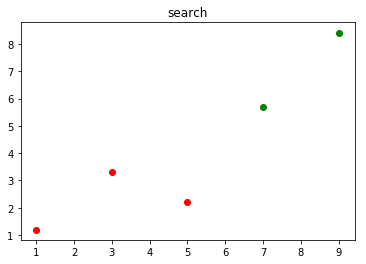

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import math

#自己弄的训练集和结果
train_x = np.array([[1,1.2],[3,3.3],[5,2.2],[7,5.7],[9,8.4]])
train_y = np.array([0,0,0,1,1])

plt.scatter(train_x[train_y == 0,0],train_x[train_y == 0,1],color="r",label="normal")
plt.scatter(train_x[train_y == 1,0],train_x[train_y == 1,1],color="g",label="bad")
plt.title("search")

Text(0.5, 1.0, 'search')

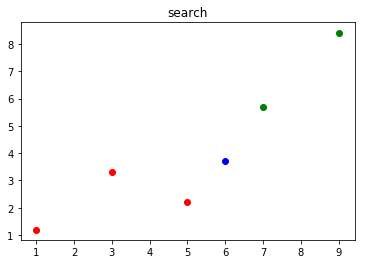

In [4]:
#x是我们要测试的值在下图用蓝色表示
x = np.array([6,3.7])

plt.scatter(train_x[train_y == 0,0],train_x[train_y == 0,1],color="r",label="normal")
plt.scatter(train_x[train_y == 1,0],train_x[train_y == 1,1],color="g",label="bad")
plt.scatter(x[0],x[1],color="b")
plt.title("search")

In [14]:
#KNN，求x与其他点的距离，并保存进distant中去

distant = []
for x_train in train_x:
    d = math.sqrt(np.sum((x - x_train)**2))
    distant.append(d)
#对所获取到的距离进行下标排序
nearst = np.argsort(distant)

# k =3 说明与三个数进行比较，看离谁近，则进行投票
#从Y_train结果训练集中获取最近三个点的结果，通过索引来获取
k = 3
#获取到排序号的点坐标，进行相应Y_train中坐标的值，才是我们想要的
topk_y = [train_y[i] for i in nearst[:k]]

In [15]:
topk_y  # 此时我们可以看到 0：1 是 2：1，所以我们应该分类为0类

[0, 1, 0]

In [17]:
from collections import Counter
# 计数完进行投票
votes = Counter(topk_y)
# 把值存在predict中来
predict = votes.most_common(1)[0][0]
predict

0

使用Scripts自己封装的KNN进行预测鸢尾花数据集

In [18]:
from Scripts.KNN import KNN
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
iris = datasets.load_iris()

iris_x = iris.data
iris_y = iris.target

In [20]:
# 进行我们的数据预处理
train_x, test_x, train_y, test_y = train_test_split(iris_x, iris_y)
stand_scaler = StandardScaler().fit(train_x)
stand_train_x = stand_scaler.transform(train_x)
stand_test_x = stand_scaler.transform(test_x)

In [21]:
knn_cls = KNN(k = 3)

In [23]:
knn_cls.fit(stand_train_x, train_y)

KNN(k=3)

In [24]:
y_predict = knn_cls.predict(stand_test_x)

In [30]:
accuracy_score(test_y, y_predict)   # 真的好棒，居然100%？？

1.0